In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

Best combination catalyst for Platinum

# **1. Compound Catalyst**

In [2]:
data = pd.read_excel("/content/Combination Catalyst.xlsx")

In [3]:
data.head()

,Catalyst,Current_Density,Pt_wt,Overpotential,Pt_size,Tafel Slope,DOI
0,Pt,10.0,31.4,50,5.00,NaN,10.1021/acsami.6b03924
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pt,20.0,31.4,74,5.00,NaN,10.1021/acsami.6b03924
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pt,10.0,20.3,18.2,4.24,NaN,10.1021/acsami.9b20781


In [4]:
data.shape

(1214, 7)

In [5]:
data.isnull().sum()

Catalyst            591
Current_Density     591
Pt_wt               665
Overpotential       608
Pt_size             714
Tafel Slope        1032
DOI                 624
dtype: int64

## **a. Handling Missing Values**

In [6]:
# 1. Remove rows that are completely empty
data_cleaned = data.dropna(how='all')

# 2. Handle rows with missing DOIs by setting them to "not available"
data_cleaned['DOI'].fillna('not available', inplace=True)

# Display the first few rows of the cleaned dataset
data_cleaned.head()


<ipython-input-6-793d5c2a8bbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['DOI'].fillna('not available', inplace=True)


,Catalyst,Current_Density,Pt_wt,Overpotential,Pt_size,Tafel Slope,DOI
0,Pt,10.0,31.4,50,5.00,NaN,10.1021/acsami.6b03924
2,Pt,20.0,31.4,74,5.00,NaN,10.1021/acsami.6b03924
4,Pt,10.0,20.3,18.2,4.24,NaN,10.1021/acsami.9b20781
6,Pt,20.0,20.3,22,4.24,NaN,10.1021/acsami.9b20781
8,Pt,10.0,20.3,63,4.24,NaN,10.1021/acsami.9b20781


In [7]:
import numpy as np

# Handle empty strings in the Overpotential column
data_cleaned['Overpotential'] = data_cleaned['Overpotential'].replace('', np.nan)

# Convert back to float
data_cleaned['Overpotential'] = data_cleaned['Overpotential'].astype(float)

# Display the first few rows of the further cleaned dataset
data_cleaned.head()


<ipython-input-7-63a511f51103>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Overpotential'] = data_cleaned['Overpotential'].replace('', np.nan)
<ipython-input-7-63a511f51103>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Overpotential'] = data_cleaned['Overpotential'].astype(float)


,Catalyst,Current_Density,Pt_wt,Overpotential,Pt_size,Tafel Slope,DOI
0,Pt,10.0,31.4,50.0,5.00,NaN,10.1021/acsami.6b03924
2,Pt,20.0,31.4,74.0,5.00,NaN,10.1021/acsami.6b03924
4,Pt,10.0,20.3,18.2,4.24,NaN,10.1021/acsami.9b20781
6,Pt,20.0,20.3,22.0,4.24,NaN,10.1021/acsami.9b20781
8,Pt,10.0,20.3,63.0,4.24,NaN,10.1021/acsami.9b20781


### **Type Conversions**

- converting current density from mA/cm2 to A/m2

In [8]:
data['Current_Density'] *= 100

- converting Overpotential from mV to V

In [9]:
# Convert the 'Overpotential' column to numeric, setting errors='coerce' to turn problematic entries into NaN
data['Overpotential'] = pd.to_numeric(data['Overpotential'], errors='coerce')
data['Overpotential'] /= 1000

- converting Tafel slope from mV/dec to V/dec

In [10]:
data['Tafel Slope'] /= 1000

In [11]:
# Define a function to calculate missing values using the Tafel equation
def fill_with_tafel(row):
    A = 10  # Given constant value for A
    if pd.notnull(row['Overpotential']) and pd.notnull(row['Current_Density']) and pd.isnull(row['Tafel Slope']):
        row['Tafel Slope'] = A * np.log10(row['Current_Density'])
    elif pd.notnull(row['Tafel Slope']) and pd.notnull(row['Current_Density']) and pd.isnull(row['Overpotential']):
        row['Overpotential'] = A * np.log10(row['Current_Density']/row['Tafel Slope'])
    return row

# Apply the Tafel equation to fill in missing values
data_filled_tafel = data_cleaned.apply(fill_with_tafel, axis=1)

# Display the dataset after filling with Tafel equation
data_filled_tafel.head()


,Catalyst,Current_Density,Pt_wt,Overpotential,Pt_size,Tafel Slope,DOI
0,Pt,10.0,31.4,50.0,5.00,10.0000,10.1021/acsami.6b03924
2,Pt,20.0,31.4,74.0,5.00,13.0103,10.1021/acsami.6b03924
4,Pt,10.0,20.3,18.2,4.24,10.0000,10.1021/acsami.9b20781
6,Pt,20.0,20.3,22.0,4.24,13.0103,10.1021/acsami.9b20781
8,Pt,10.0,20.3,63.0,4.24,10.0000,10.1021/acsami.9b20781


In [12]:
from sklearn.preprocessing import LabelEncoder

# 1. Prepare the Data:

# Label encode the 'Catalyst' and 'DOI' columns
label_encoders = {}
for col in ['Catalyst', 'DOI']:
    le = LabelEncoder()
    data_filled_tafel[col] = le.fit_transform(data_filled_tafel[col])
    label_encoders[col] = le

In [13]:
# Split the data into sets with missing values and without missing values
data_no_missing = data_filled_tafel.dropna()
data_with_missing = data_filled_tafel.loc[~data_filled_tafel.index.isin(data_no_missing.index)]

# Display the dataset after label encoding and splitting
data_filled_tafel.head(), data_no_missing.shape, data_with_missing.shape


(   Catalyst  Current_Density  Pt_wt  Overpotential  Pt_size  Tafel Slope  DOI
 0        51             10.0   31.4           50.0     5.00      10.0000   39
 2        51             20.0   31.4           74.0     5.00      13.0103   39
 4        51             10.0   20.3           18.2     4.24      10.0000   41
 6        51             20.0   20.3           22.0     4.24      13.0103   41
 8        51             10.0   20.3           63.0     4.24      10.0000   41,
 (477, 7),
 (149, 7))

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import IterativeImputer

In [15]:
# Use IterativeImputer with a Random Forest estimator
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=42), max_iter=10, random_state=42)

# Fit and transform the data
data_imputed = imputer.fit_transform(data_filled_tafel)

# Convert the numpy array back to a DataFrame
data_filled_iterative = pd.DataFrame(data_imputed, columns=data_filled_tafel.columns)

# Display the dataset after iterative imputation
data_filled_iterative.head()


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Catalyst,Current_Density,Pt_wt,Overpotential,Pt_size,Tafel Slope,DOI
0,51.0,10.0,31.4,50.0,5.00,10.0000,39.0
1,51.0,20.0,31.4,74.0,5.00,13.0103,39.0
2,51.0,10.0,20.3,18.2,4.24,10.0000,41.0
3,51.0,20.0,20.3,22.0,4.24,13.0103,41.0
4,51.0,10.0,20.3,63.0,4.24,10.0000,41.0


decoding the encoded data

In [16]:
# Decode the label-encoded columns back to their original values
for col, le in label_encoders.items():
    data_filled_iterative[col] = le.inverse_transform(data_filled_iterative[col].astype(int))

# Display the dataset after decoding
data_filled_iterative.head()


,Catalyst,Current_Density,Pt_wt,Overpotential,Pt_size,Tafel Slope,DOI
0,Pt,10.0,31.4,50.0,5.00,10.0000,10.1021/acsami.6b03924
1,Pt,20.0,31.4,74.0,5.00,13.0103,10.1021/acsami.6b03924
2,Pt,10.0,20.3,18.2,4.24,10.0000,10.1021/acsami.9b20781
3,Pt,20.0,20.3,22.0,4.24,13.0103,10.1021/acsami.9b20781
4,Pt,10.0,20.3,63.0,4.24,10.0000,10.1021/acsami.9b20781


Labelling the datapoints

In [17]:
# Calculate the 5th and 95th percentiles for both Tafel slope and Overpotential scores
tafel_5th_percentile = data_filled_iterative['Tafel Slope'].quantile(0.05)
tafel_95th_percentile = data_filled_iterative['Tafel Slope'].quantile(0.95)

overpotential_5th_percentile = data_filled_iterative['Overpotential'].quantile(0.05)
overpotential_95th_percentile = data_filled_iterative['Overpotential'].quantile(0.95)

tafel_5th_percentile, tafel_95th_percentile, overpotential_5th_percentile, overpotential_95th_percentile


(10.0, 87.5, 16.125, 294.75)

In [18]:
# Function to assign labels based on Tafel slope and Overpotential scores
def assign_labels(row):
    if row['Tafel Slope'] <= tafel_5th_percentile and row['Overpotential'] <= overpotential_5th_percentile:
        return "Best"
    elif row['Tafel Slope'] >= tafel_95th_percentile and row['Overpotential'] >= overpotential_95th_percentile:
        return "Worst"
    elif row['Tafel Slope'] <= tafel_5th_percentile:
        return "Excellent"
    elif row['Tafel Slope'] <= data_filled_iterative['Tafel Slope'].quantile(0.25):
        return "Good"
    elif row['Tafel Slope'] <= data_filled_iterative['Tafel Slope'].quantile(0.5):
        return "Average"
    elif row['Tafel Slope'] <= data_filled_iterative['Tafel Slope'].quantile(0.75):
        return "Below Average"
    else:
        return "Poor"

# Assign labels to the data
data_filled_iterative['Label'] = data_filled_iterative.apply(assign_labels, axis=1)

# Display the value counts of the labels
label_counts = data_filled_iterative['Label'].value_counts()
label_counts


Excellent        136
Poor             136
Average          131
Below Average    110
Good              90
Best              12
Worst             11
Name: Label, dtype: int64

## **b. Exploratory Data Analysis**

In [19]:
# Display the value counts of the DOI column
doi_value_counts = data_filled_iterative['DOI'].value_counts()
doi_value_counts

10.1021/acsami.8b20209             83
10.1039/c9ta04010b                 52
not available                      36
10.1016/j.jelechem.2018.05.013     31
10.1021/acsami.6b03924             27
10.1021/acscatal.9b02305           26
10.1016/j.jcis.2018.06.096         25
10.1021/acsami.9b20781             22
10.1021/acs.jpcc.7b08283           21
10.1039/c9cy02285f                 20
10.1021/acs.jpcc.0c01043           18
10.1039/c9nj03675j                 16
10.1016/j.electacta.2019.06.116    15
10.1016/j.ijhydene.2019.10.036     15
10.1016/j.nanoen.2019.06.045       13
10.1039/c8sc04986f                 13
10.1016/j.electacta.2019.134895    12
10.1021/acs.jpcc.7b01447           12
10.1039/c9ta07469d                 12
10.3390/ma13071513                 11
10.1039/c8ee02888e                 10
10.1016/j.carbon.2019.01.087       10
10.1038/s41467-019-12851-w          9
10.1016/j.jcat.2018.11.006          9
10.3389/fmats.2019.00251            8
10.1016/j.jcat.2017.08.005          8
10.1016/j.na

In [20]:
# Generate summary statistics for the numeric columns
summary_statistics = data_filled_iterative[['Tafel Slope', 'Overpotential', 'Pt_wt', 'Pt_size', 'Current_Density']].describe()

summary_statistics


,Tafel Slope,Overpotential,Pt_wt,Pt_size,Current_Density
count,626.000000,626.000000,626.000000,626.000000,626.000000
mean,26.822294,95.182003,8.504629,4.068421,31.226757
std,29.472119,126.318263,10.023249,5.481165,50.743173
min,10.000000,-12.810334,0.000000,0.000000,10.000000
25%,13.010300,35.400000,1.500000,1.515000,10.000000
50%,16.989700,56.000000,5.700000,3.320000,10.000000
75%,30.000000,95.750000,13.424000,4.948300,40.000000
max,227.000000,766.000000,88.670000,70.000000,705.000000


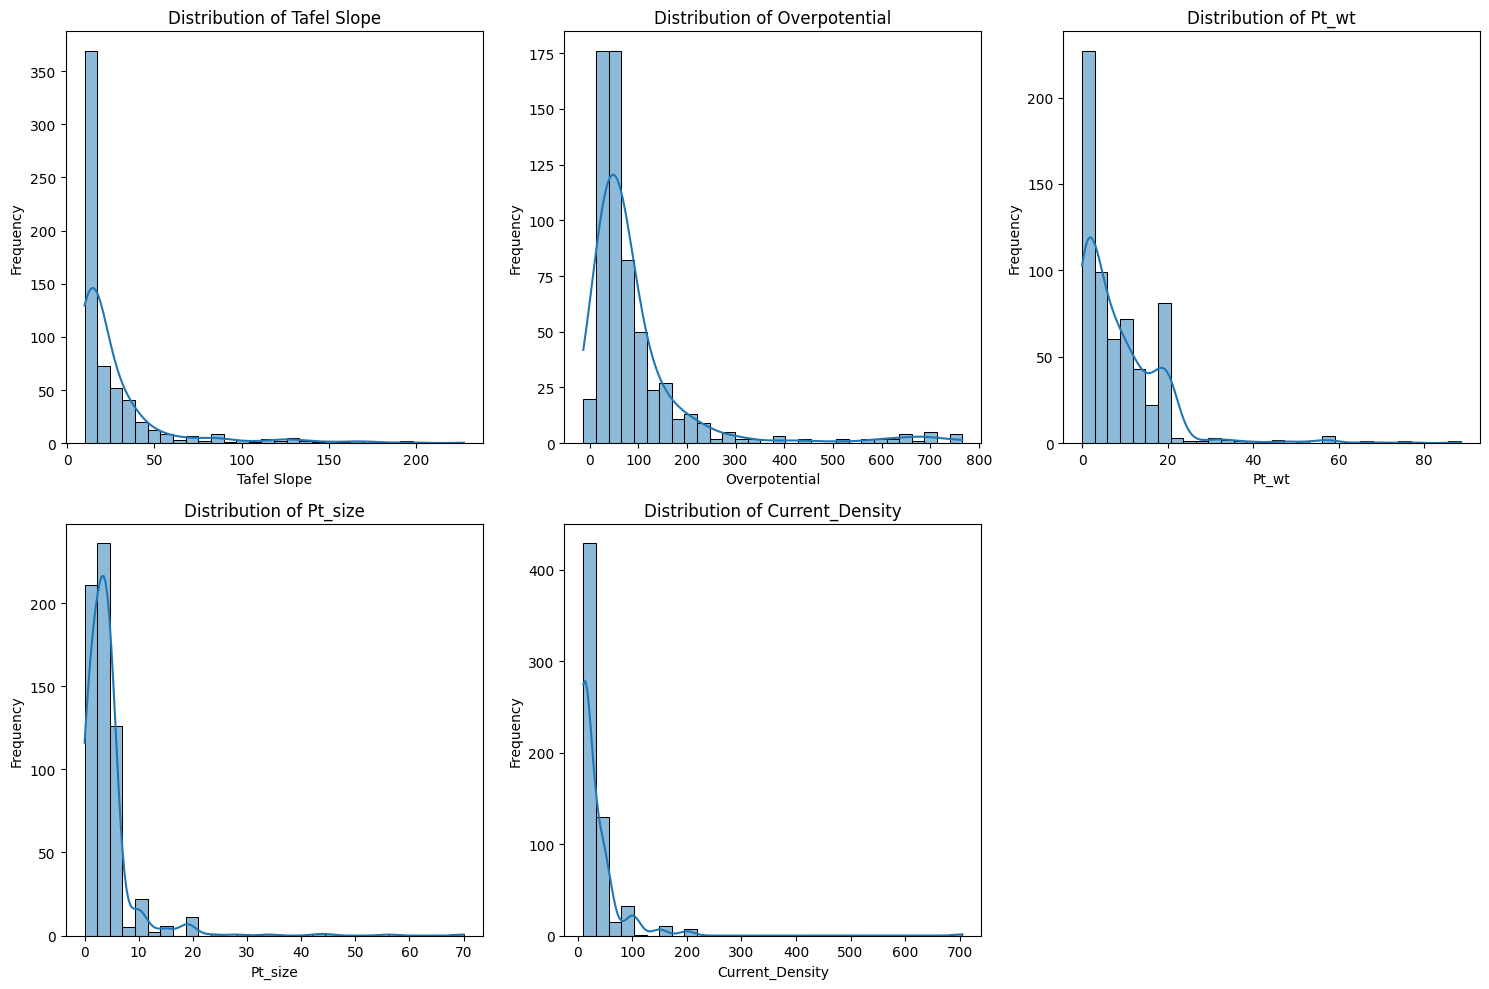

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create distribution plots for the numeric columns
columns = ['Tafel Slope', 'Overpotential', 'Pt_wt', 'Pt_size', 'Current_Density']
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_filled_iterative[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


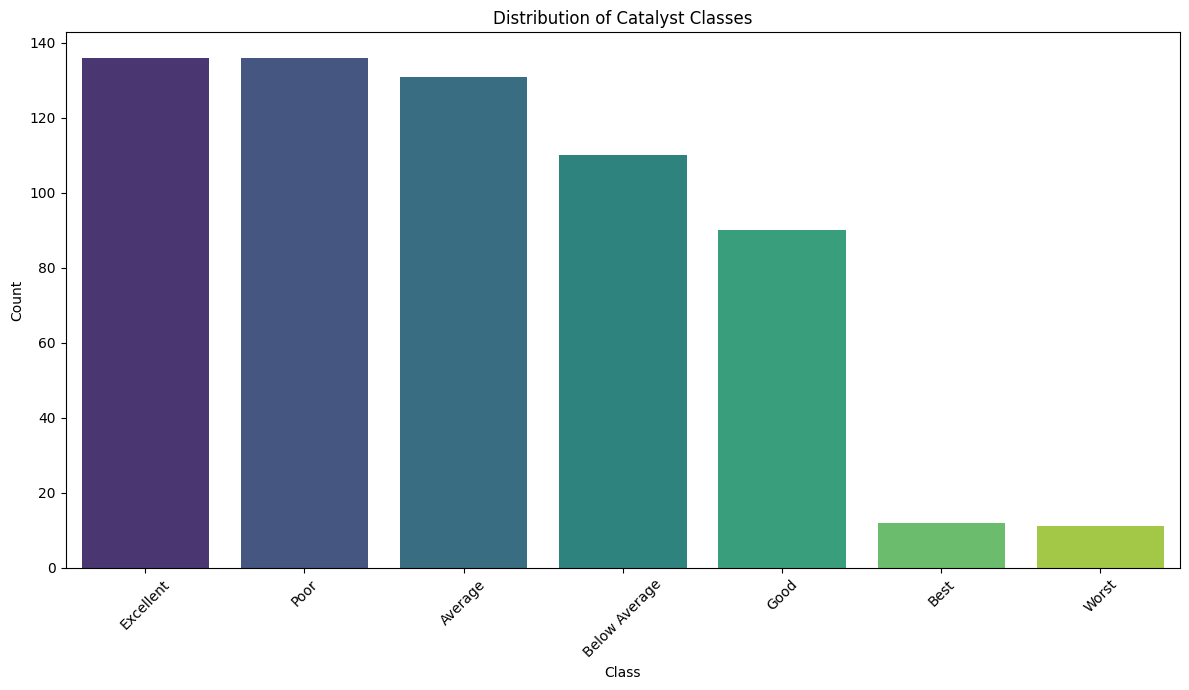

In [22]:
# Create a bar chart for the 'Label' column
plt.figure(figsize=(12, 7))
sns.countplot(data=data_filled_iterative, x='Label', order=data_filled_iterative['Label'].value_counts().index, palette='viridis')
plt.title('Distribution of Catalyst Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **c. Building a Classification Model**

In [23]:
data= data_filled_iterative.copy()

### **Label Encoding**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Catalyst' column
le_catalyst = LabelEncoder()
data['Catalyst'] = le_catalyst.fit_transform(data_filled_iterative['Catalyst'])


### **Train Test Split**

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70:30) with stratified splitting based on the 'Label' column
X = data.drop(['Label','DOI'], axis=1)
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(438, 6) (188, 6) (438,) (188,)


### **Model Building**

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)
5. Gradient Boosting Classifier

In [26]:
#Surpressing warnings
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Ignore the UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [28]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [29]:
# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully!")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
Support Vector Machine trained successfully!
Gradient Boosting trained successfully!


### **Model Evaluation**

In [30]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [31]:
# Function to calculate multi-class ROC AUC score
def multi_class_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [32]:
# Create a dictionary to store the predictions for each model and their accuracy scores
predictions = {}
accuracy_scores = {}

# Predict the labels on the test data and compute accuracy for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    predictions[name] = y_pred

In [33]:
# Compute and display the performance metrics for each model
for name, y_pred in predictions.items():
    print("\n\n", name)
    print("Accuracy: ", accuracy_scores[name])
    print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))
    print("ROC AUC Score:", multi_class_roc_auc_score(y_test, y_pred))
    print("Classification Report")
    print(classification_report(y_test, y_pred))



 Logistic Regression
Accuracy:  0.9308510638297872
F1 Score:  0.9276429112667219
ROC AUC Score: 0.9137397561291808
Classification Report
               precision    recall  f1-score   support

      Average       0.93      0.95      0.94        39
Below Average       0.90      0.79      0.84        33
         Best       1.00      0.50      0.67         4
    Excellent       0.95      1.00      0.98        41
         Good       0.96      1.00      0.98        27
         Poor       0.91      0.98      0.94        41
        Worst       1.00      0.67      0.80         3

     accuracy                           0.93       188
    macro avg       0.95      0.84      0.88       188
 weighted avg       0.93      0.93      0.93       188



 Decision Tree
Accuracy:  0.9893617021276596
F1 Score:  0.9888694823753573
ROC AUC Score: 0.973501577769469
Classification Report
               precision    recall  f1-score   support

      Average       1.00      1.00      1.00        39
Below Aver

## **d. Displaying the best alternative catalysts**

In [39]:
data_filled_iterative.head(10)

,Catalyst,Current_Density,Pt_wt,Overpotential,Pt_size,Tafel Slope,DOI,Label
0,Pt,10.0,31.4,50.00,5.00,10.0000,10.1021/acsami.6b03924,Excellent
1,Pt,20.0,31.4,74.00,5.00,13.0103,10.1021/acsami.6b03924,Good
2,Pt,10.0,20.3,18.20,4.24,10.0000,10.1021/acsami.9b20781,Excellent
3,Pt,20.0,20.3,22.00,4.24,13.0103,10.1021/acsami.9b20781,Good
4,Pt,10.0,20.3,63.00,4.24,10.0000,10.1021/acsami.9b20781,Excellent
5,Pt,20.0,20.3,97.00,4.24,13.0103,10.1021/acsami.9b20781,Good
6,Pt,10.0,20.1,66.00,5.00,10.0000,10.1021/acsami.6b03924,Excellent
7,Pt,20.0,20.1,92.00,5.00,13.0103,10.1021/acsami.6b03924,Good
8,Pt,10.0,20.0,42.03,3.32,10.0000,10.1021/acscatal.9b02305,Excellent
9,Pt,20.0,20.0,51.00,3.32,13.0103,10.1021/acscatal.9b02305,Good


In [45]:
label_order = ["Best", "Excellent", "Good", "Average", "Below Average", "Worst"]
label_mapping = {label: idx for idx, label in enumerate(label_order)}

# Sorting the data
sorted_data = data_filled_iterative.sort_values(by=["Label", "Overpotential", "Tafel Slope"],
                                       key=lambda col: col.map(label_mapping) if col.name == "Label" else col)

sorted_data.head(10)

,Catalyst,Current_Density,Pt_wt,Overpotential,Pt_size,Tafel Slope,DOI,Label
117,Pt/nitrogen doped ordered mesoporous carbon (P...,10.0,7.2000,8.0,3.7600,10.0,10.1016/j.jcis.2018.06.096,Best
177,electron-enriched Pt nanoclusters on S-doped c...,10.0,4.0000,11.0,1.5600,10.0,10.1038/s41467-019-12851-w,Best
294,single Pt atoms anchored on aniline-stacked gr...,10.0,0.4400,12.0,0.3500,10.0,10.1039/c8ee02888e,Best
594,PtNi(N) NW,10.0,13.4215,13.0,4.8607,10.0,not available,Best
614,PtNi(N) NW,10.0,13.4215,13.0,4.8607,10.0,not available,Best
460,20 Pt/C,10.0,18.9030,13.4,15.6006,10.0,10.1016/j.electacta.2019.134895,Best
28,Pt,10.0,17.2000,14.3,3.0500,10.0,10.1021/acsami.9b20781,Best
275,Pt/A-CN(PANI)NH3,10.0,0.9500,15.9,3.0000,10.0,10.1021/acs.jpcc.7b01447,Best
398,A-CN(PANI)NH3,10.0,0.9500,15.9,3.0000,10.0,10.1021/acs.jpcc.7b01447,Best
277,Pt/A-CN(PDAP)Ar,10.0,0.8000,16.0,3.0000,10.0,10.1021/acs.jpcc.7b01447,Best


In [46]:
sorted_data = sorted_data.drop([398, 397])

In [47]:
sorted_data[sorted_data['Label']=='Best']

,Catalyst,Current_Density,Pt_wt,Overpotential,Pt_size,Tafel Slope,DOI,Label
117,Pt/nitrogen doped ordered mesoporous carbon (P...,10.0,7.2000,8.0,3.7600,10.0,10.1016/j.jcis.2018.06.096,Best
177,electron-enriched Pt nanoclusters on S-doped c...,10.0,4.0000,11.0,1.5600,10.0,10.1038/s41467-019-12851-w,Best
294,single Pt atoms anchored on aniline-stacked gr...,10.0,0.4400,12.0,0.3500,10.0,10.1039/c8ee02888e,Best
594,PtNi(N) NW,10.0,13.4215,13.0,4.8607,10.0,not available,Best
614,PtNi(N) NW,10.0,13.4215,13.0,4.8607,10.0,not available,Best
460,20 Pt/C,10.0,18.9030,13.4,15.6006,10.0,10.1016/j.electacta.2019.134895,Best
28,Pt,10.0,17.2000,14.3,3.0500,10.0,10.1021/acsami.9b20781,Best
275,Pt/A-CN(PANI)NH3,10.0,0.9500,15.9,3.0000,10.0,10.1021/acs.jpcc.7b01447,Best
277,Pt/A-CN(PDAP)Ar,10.0,0.8000,16.0,3.0000,10.0,10.1021/acs.jpcc.7b01447,Best
525,20 Pt/C,10.0,20.0000,16.0,5.2857,10.0,10.1016/j.apcatb.2019.118582,Best


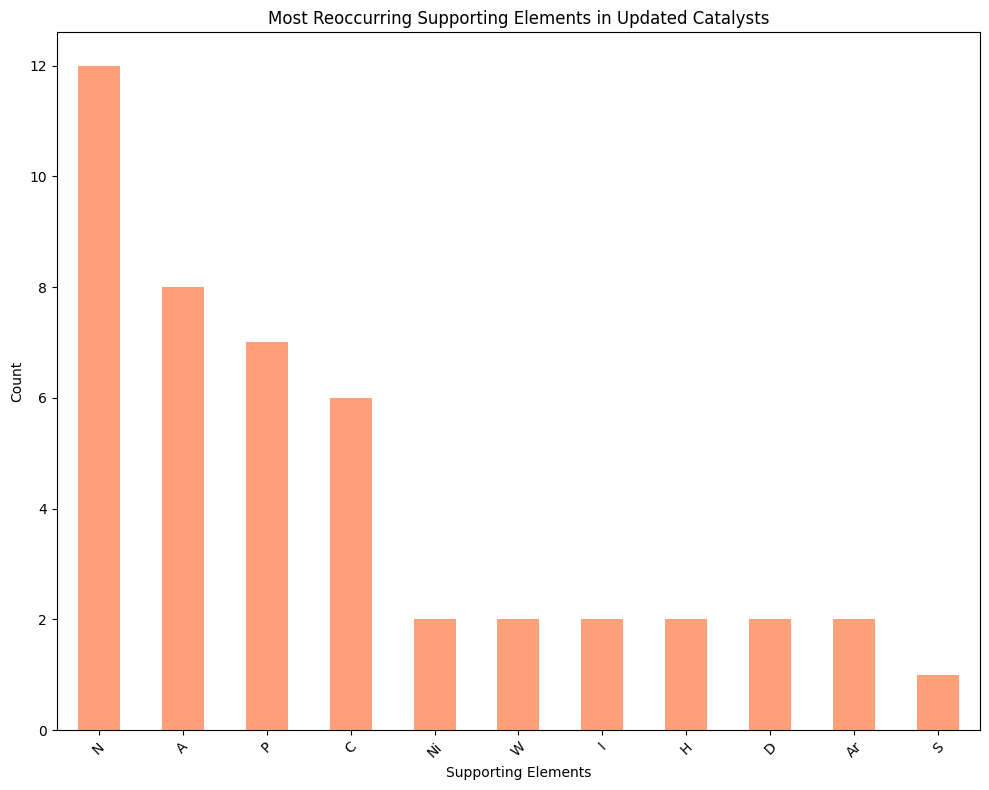

In [38]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Updated catalysts data
updated_catalysts = [
    'Pt/nitrogen doped ordered mesoporous carbon (P...)', 'electron-enriched Pt nanoclusters on S-doped c...',
    'single Pt atoms anchored on aniline-stacked gr...', 'PtNi(N) NW', 'PtNi(N) NW', '20 Pt/C',
    'Pt', 'Pt/A-CN(PANI)NH3', 'A-CN(PANI)NH3', 'Pt/A-CN(PDAP)Ar', 'A-CN(PDAP)Ar', '20 Pt/C'
]

# Extract individual elements (supporting elements) from the Catalyst column
supporting_elements = []
for catalyst in updated_catalysts:
    # Extracting potential element symbols using regex
    extracted_elements = re.findall(r'[A-Z][a-z]*', catalyst)
    # Filtering out 'Pt' to focus on supporting elements
    extracted_elements = [ele for ele in extracted_elements if ele != 'Pt']
    supporting_elements.extend(extracted_elements)

# Count occurrences of each supporting element
supporting_element_counts = pd.Series(supporting_elements).value_counts()

# Plot the most reoccurring supporting elements
plt.figure(figsize=(10, 8))
supporting_element_counts.plot(kind='bar', color='lightsalmon')
plt.title('Most Reoccurring Supporting Elements in Updated Catalysts')
plt.xlabel('Supporting Elements')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
